
# 🌍 Africa Conflict Risk Prediction Model

This notebook is part of a **groundbreaking AI-driven platform** to predict, analyze, and localize **conflict risks** across Africa. Built for government and professional use.

---

## 🎯 Objectives

- Load and explore a rich ACLED-style dataset of conflict events.
- Professionally select features important to geopolitical intelligence.
- Preprocess and clean the data.
- Engineer a binary risk label based on fatalities.
- Train a machine learning model to predict high-risk conflict events.
- Evaluate model performance.


In [2]:

import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("Conflicts-afri_datahome - data_set-conflict (1).csv", low_memory=False)
df.head()


,GWNO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,ACTOR1,ALLY_ACTOR_1,INTER1,...,ADMIN1,ADMIN2,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,NOTES,FATALITIES
0,615,16ALG,16,01/02/1997,1997,1,Violence against civilians,GIA: Armed Islamic Group,NaN,2,...,Bordj Bou Arreridj,Tixter,NaN,Mechta Larbaa,36.0466,5.1317,1,www.algeria-watch.org,1 February: 7 citizens of a farming estate (Ha...,7
1,615,39ALG,39,02/06/1997,1997,1,Remote violence,GIA: Armed Islamic Group,NaN,2,...,Alger,Sidi MHamed,NaN,Algiers,36.7525,3.0420,1,www.algeria-watch.org,2 June: Explosion of a bomb in the working-cla...,10
2,615,45ALG,45,02/07/1997,1997,1,Violence against civilians,GIA: Armed Islamic Group,NaN,2,...,Mascara,Benian,NaN,Chabet Larbaa,35.0961,0.2078,1,www.algeria-watch.org,2 July: 4 people of the same family were kille...,4
3,615,77ALG,77,02/09/1997,1997,1,Violence against civilians,GIA: Armed Islamic Group,NaN,2,...,Mascara,Tighenif,NaN,Ouled Larbi,35.4156,0.2825,1,www.algeria-watch.org,2 September: 22 citizen including 10 children ...,22
4,615,87ALG,87,02/10/1997,1997,1,Violence against civilians,GIA: Armed Islamic Group,NaN,2,...,Medea,Seghouane,NaN,Chaba Melaha,36.0101,2.8989,1,www.algeria-watch.org,2 Oct 1997: 37 people were killed in the villa...,37


In [3]:

# Explore the structure and quality of the dataset
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140747 entries, 0 to 140746
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   GWNO              140747 non-null  int64 
 1   EVENT_ID_CNTY     140747 non-null  object
 2   EVENT_ID_NO_CNTY  140747 non-null  int64 
 3   EVENT_DATE        140747 non-null  object
 4   YEAR              140747 non-null  object
 5   TIME_PRECISION    140747 non-null  int64 
 6   EVENT_TYPE        140747 non-null  object
 7   ACTOR1            140747 non-null  object
 8   ALLY_ACTOR_1      22627 non-null   object
 9   INTER1            140747 non-null  int64 
 10  ACTOR1_ID         140747 non-null  int64 
 11  ACTOR2            105460 non-null  object
 12  ALLY_ACTOR_2      16028 non-null   object
 13  INTER2            140747 non-null  int64 
 14  ACTOR2_ID         140747 non-null  int64 
 15  INTERACTION       140747 non-null  int64 
 16  ACTOR_DYAD_ID     140747 non-null  obj

,GWNO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,ACTOR1,ALLY_ACTOR_1,INTER1,...,ADMIN1,ADMIN2,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,NOTES,FATALITIES
count,140747.000000,140747,140747.000000,140747,140747,140747.000000,140747,140747,22627,140747.000000,...,140747,140633,75295,140744,140747,140747,140747.000000,140574,130520,140747.000000
unique,NaN,140747,NaN,7297,21,NaN,9,3031,2914,NaN,...,729,3879,4607,17070,13845,13975,NaN,11105,110301,NaN
top,NaN,5515ZIM,NaN,15/02/1998,2016,NaN,Violence against civilians,Unidentified Armed Group (Somalia),Muslim Brotherhood,NaN,...,Banaadir,Mogadisho,Harare City Council,Mogadishu,2.0414,45.3500,NaN,Local Source Project,looting/presense,NaN
freq,NaN,1,NaN,130,17539,NaN,39126,5382,1438,NaN,...,7188,7188,1899,1500,1517,1660,NaN,14501,808,NaN
mean,536.733977,NaN,70374.000000,NaN,NaN,1.146483,NaN,NaN,NaN,3.327069,...,NaN,NaN,NaN,NaN,NaN,NaN,1.263743,NaN,NaN,4.878143
std,61.466162,NaN,40630.303506,NaN,NaN,0.455928,NaN,NaN,NaN,2.017384,...,NaN,NaN,NaN,NaN,NaN,NaN,0.528826,NaN,NaN,82.492418
min,404.000000,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000
25%,490.000000,NaN,35187.500000,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000
50%,520.000000,NaN,70374.000000,NaN,NaN,1.000000,NaN,NaN,NaN,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000
75%,600.000000,NaN,105560.500000,NaN,NaN,1.000000,NaN,NaN,NaN,5.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000



## ✅ Feature Selection Justification

We are building a model not just for prediction, but for **real-world decision support**. We select features based on:

- **Location**: `COUNTRY`, `ADMIN1` (targeting and resource dispatch)
- **Actors**: `ACTOR1`, `EVENT_TYPE` (predicting group behavior)
- **Geolocation**: `LATITUDE`, `LONGITUDE` (for map overlay)
- **Time**: `YEAR` (detecting trends and seasonal risk)
- **Fatalities**: To generate our binary risk label


In [4]:

from sklearn.preprocessing import LabelEncoder

df['EVENT_DATE'] = pd.to_datetime(df['EVENT_DATE'], dayfirst=True, errors='coerce')
df['FATALITIES'] = pd.to_numeric(df['FATALITIES'], errors='coerce').fillna(0)
df['LATITUDE'] = pd.to_numeric(df['LATITUDE'], errors='coerce')
df['LONGITUDE'] = pd.to_numeric(df['LONGITUDE'], errors='coerce')
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')

# Filter only rows with essential values
df_model = df[['COUNTRY', 'ADMIN1', 'EVENT_TYPE', 'ACTOR1', 'LATITUDE', 'LONGITUDE', 'YEAR', 'FATALITIES']].dropna()

# Create target variable
df_model['CONFLICT_RISK'] = (df_model['FATALITIES'] >= 5).astype(int)

# Encode categoricals
for col in ['COUNTRY', 'ADMIN1', 'EVENT_TYPE', 'ACTOR1']:
    df_model[col] = LabelEncoder().fit_transform(df_model[col].astype(str))

# Normalize coordinates
df_model['LATITUDE'] = (df_model['LATITUDE'] - df_model['LATITUDE'].min()) / (df_model['LATITUDE'].max() - df_model['LATITUDE'].min())
df_model['LONGITUDE'] = (df_model['LONGITUDE'] - df_model['LONGITUDE'].min()) / (df_model['LONGITUDE'].max() - df_model['LONGITUDE'].min())

df_model.head()


,COUNTRY,ADMIN1,EVENT_TYPE,ACTOR1,LATITUDE,LONGITUDE,YEAR,FATALITIES,CONFLICT_RISK
0,0,96,8,760,0.982944,0.328762,1997.0,7,1
1,0,24,5,760,0.992750,0.298359,1997.0,10,1
2,0,426,8,760,0.969739,0.257123,1997.0,4,0
3,0,426,8,760,0.974178,0.258209,1997.0,22,1
4,0,445,8,760,0.982436,0.296277,1997.0,37,1


In [9]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Prepare data
X = df_model.drop(['FATALITIES', 'CONFLICT_RISK'], axis=1)
y = df_model['CONFLICT_RISK']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=150, max_depth=12, min_samples_split=5, random_state=42)
model.fit(X_train, y_train)

# Save model
joblib.dump(model, 'conflict_model_final.pkl')


['conflict_model_final.pkl']

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     24932
           1       0.70      0.15      0.25      3216

    accuracy                           0.90     28148
   macro avg       0.80      0.57      0.60     28148
weighted avg       0.88      0.90      0.86     28148



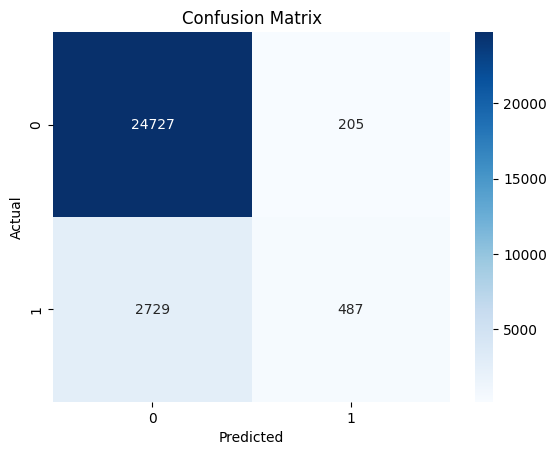

In [6]:

# Predict and evaluate
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



## 🔎 Testing the Model on Realistic New Data

We simulate a few conflict scenarios and pass them into the model to see how it predicts:


In [8]:

# Example: Test on 3 handcrafted "new" events
sample_inputs = pd.DataFrame({
    'COUNTRY': [5, 20, 12],        # Encoded countries (e.g., Nigeria, Sudan, etc.)
    'ADMIN1': [10, 4, 8],          # Encoded regions
    'EVENT_TYPE': [1, 3, 0],       # Violence, Battles, Protests, etc.
    'ACTOR1': [15, 6, 23],         # Encoded actors (e.g., police, militia)
    'LATITUDE': [0.55, 0.78, 0.42],# Normalized latitudes
    'LONGITUDE': [0.33, 0.61, 0.29],# Normalized longitudes
    'YEAR': [2024, 2023, 2025]     # Most recent years
})

# Predict with trained model
sample_preds = model.predict(sample_inputs)
sample_preds_proba = model.predict_proba(sample_inputs)

# Show predictions
for i, (pred, prob) in enumerate(zip(sample_preds, sample_preds_proba)):
    print(f"Sample {i+1}: Predicted RISK = {'HIGH' if pred == 1 else 'LOW'}, Probability = {prob[1]:.2f}")


Sample 1: Predicted RISK = LOW, Probability = 0.34
Sample 2: Predicted RISK = LOW, Probability = 0.13
Sample 3: Predicted RISK = LOW, Probability = 0.31
